In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("ggplot")

from snippets.categorical import cat_preprocessor_obj
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [2]:
ext_df = pd.read_csv("data/student-exam-expanded.csv")
print(ext_df.shape)
ext_df.head()

(30641, 15)


,Unnamed: 0,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5 - 10,69,90,88
2,2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
3,3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,5 - 10,45,56,42
4,4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75


In [3]:
df = pd.read_csv("data/student-exam-original.csv")
print(df.shape)
df.head()

(30641, 9)


,Unnamed: 0,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,MathScore,ReadingScore,WritingScore
0,0,female,group B,bachelor's degree,standard,none,72,72,74
1,1,female,group C,some college,standard,completed,69,90,88
2,2,female,group B,master's degree,standard,none,90,95,93
3,3,male,group A,associate's degree,free/reduced,none,47,57,44
4,4,male,group C,some college,standard,none,76,78,75


In [4]:
ext_df.columns

Index(['Unnamed: 0', 'Gender', 'EthnicGroup', 'ParentEduc', 'LunchType',
       'TestPrep', 'ParentMaritalStatus', 'PracticeSport', 'IsFirstChild',
       'NrSiblings', 'TransportMeans', 'WklyStudyHours', 'MathScore',
       'ReadingScore', 'WritingScore'],
      dtype='object')

In [5]:
df.columns

Index(['Unnamed: 0', 'Gender', 'EthnicGroup', 'ParentEduc', 'LunchType',
       'TestPrep', 'MathScore', 'ReadingScore', 'WritingScore'],
      dtype='object')

## Approach for Analysis

1. First, analyse the `student-exam-original.csv` beacuse it is subset of `student-exam-extended.csv` dataset.
2. After analysing **original dataset** we can then apply same method on **extended dataset**.

## Student Exam - Original

In [6]:
df.drop(columns=["Unnamed: 0"], inplace=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30641 entries, 0 to 30640
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Gender        30641 non-null  object
 1   EthnicGroup   30641 non-null  object
 2   ParentEduc    30641 non-null  object
 3   LunchType     30641 non-null  object
 4   TestPrep      30641 non-null  object
 5   MathScore     30641 non-null  int64 
 6   ReadingScore  30641 non-null  int64 
 7   WritingScore  30641 non-null  int64 
dtypes: int64(3), object(5)
memory usage: 1.9+ MB


In [8]:
num_cols: list[str] = df.select_dtypes(exclude="O").columns.tolist()
cat_cols: list[str] = df.select_dtypes(include="O").columns.tolist()

cat_cols, num_cols

(['Gender', 'EthnicGroup', 'ParentEduc', 'LunchType', 'TestPrep'],
 ['MathScore', 'ReadingScore', 'WritingScore'])

### Categorical Analysis

In [9]:
for_ord_encoding = ["ParentEduc", "LunchType"]
for_ohe_encoding = ["TestPrep", "Gender", "EthnicGroup"]

In [10]:
# cat_preprocessor = cat_preprocessor_obj(for_ord_encoding, for_ohe_encoding)
# cat_trf = cat_preprocessor.fit_transform(df)

In [74]:
def plot_count_plots(df: pd.DataFrame, columns: list[str]):
    num_plots = len(columns)

    cols = int(np.ceil(np.sqrt(num_plots)))
    rows = int(np.ceil(num_plots / cols))

    fig, axes = plt.subplots(rows, cols, figsize=(15, 10))
    fig.tight_layout(pad=4.0)

    for i, col in enumerate(columns):
        ax: plt.Axes = axes[i // cols, i % cols] if num_plots > 1 else axes  # type: ignore
        sns.countplot(data=df, x=col, ax=ax)
        ax.set_xlabel(col)
        ax.set_ylabel("Count")

    plt.show()

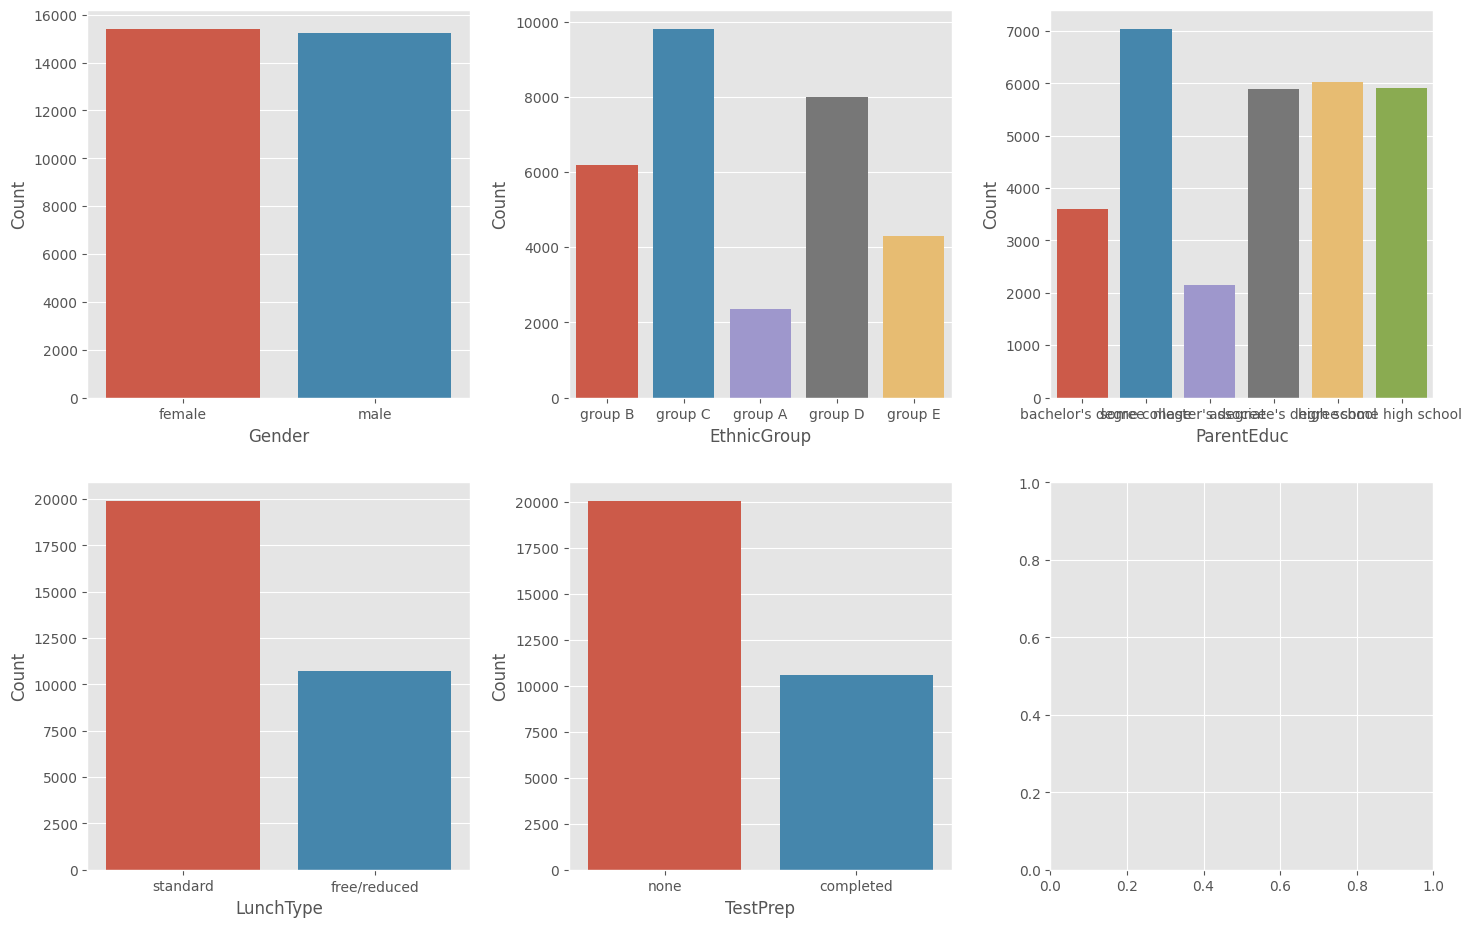

In [78]:
plot_count_plots(df, cat_cols)

In [125]:
def plot_categorical_numerical_agg(
    df: pd.DataFrame,
    x_cat_cols: list[str],
    y_num_cols: list[str],
    agg: list[str] = ["mean"],
) -> None:
    num_plots = len(x_cat_cols) * len(y_num_cols)
    cols = int(np.ceil(np.sqrt(num_plots)))
    rows = int(np.ceil(num_plots / cols))

    for method in agg:
        plot_count = 0

        fig, axes = plt.subplots(rows, cols, figsize=(15, 10))
        fig.tight_layout(pad=4.0)
        fig.suptitle(f"Aggregate method: {method.capitalize()}", fontsize=15)

        for x_col in x_cat_cols:
            for y_col in y_num_cols:
                ax: plt.Axes = (
                    axes[plot_count // cols, plot_count % cols] if num_plots > 1 else axes
                )  # type: ignore
                sns.barplot(data=df, x=x_col, y=y_col, estimator=method, ax=ax)

                ax.set_xlabel(x_col)

                plot_count += 1

    plt.show()

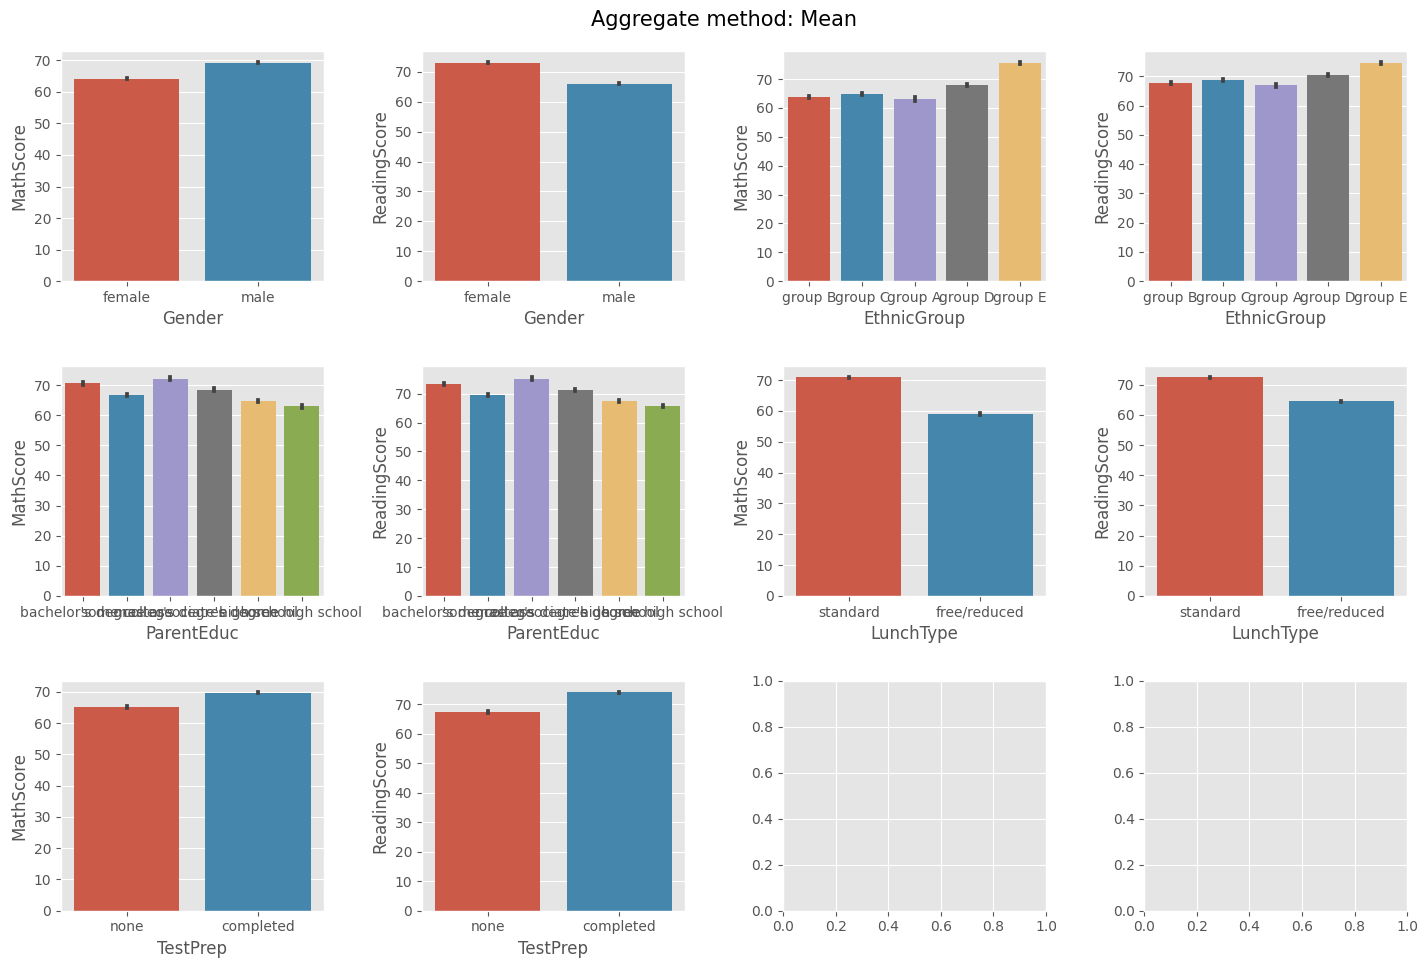

In [126]:
plot_categorical_numerical_agg(df, cat_cols, num_cols[:2], ["mean"])

Text(0, 0.5, 'WritingScore')

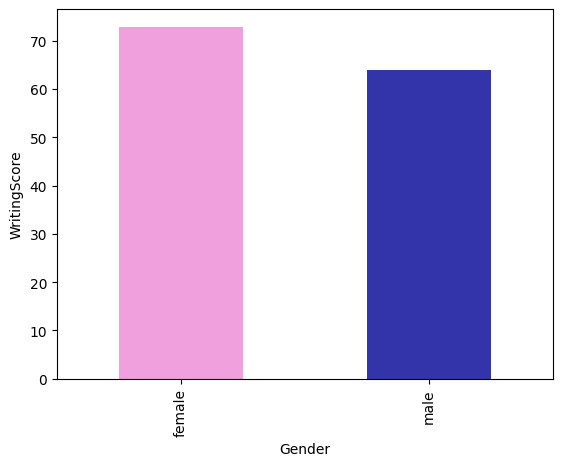

In [55]:
df.groupby("Gender")["WritingScore"].agg("mean").plot.bar(color=["#f0a0dd", "#3333aa"])
plt.ylabel("WritingScore")

### Numerical Analysis

In [29]:
temp = df.sample(500)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning:

The figure layout has changed to tight



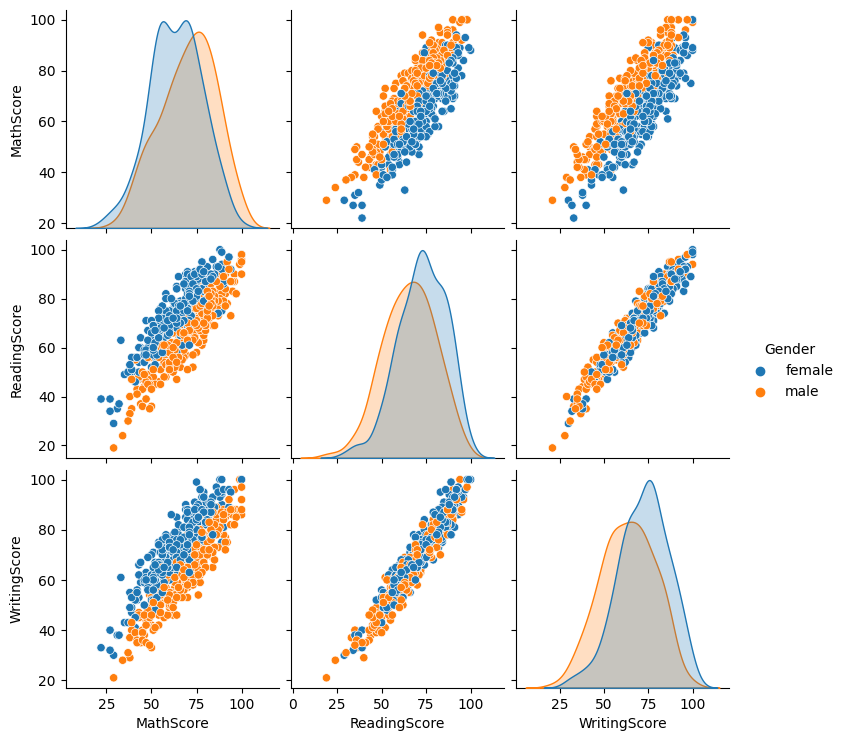

In [33]:
sns.pairplot(temp, hue="Gender")

- All graphs shows a positive relationship between one-another.

- While Females scores higher in Reading and Writing. On the other hand, Males scores higher in Math. This can be infuenced by various other parameter like stereotypes, personal interests or educational background, etc.

- The graph shows that there is a difference in the average reading and math scores between males and females. Females tend to score higher on reading, while males tend to score higher on math. This difference is statistically significant, meaning that it is unlikely to be due to chance.

**Hence, Gender feature is important to build ML Model because it relates with all of the Numerical features.**